In [29]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sys, collections, os, argparse
%matplotlib inline  

from scipy.io import mmread
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import scanpy.api as sc
from scipy.stats import gaussian_kde

In [30]:
#load human transcript to gene map

tr2g = {}
trlist = []
with open('../homo_sapiens/transcripts_to_genes.txt') as f:
    for line in f:
        l = line.split()
        tr2g[l[1]] = l[2]
        trlist.append(l[1])

genes = list(set(tr2g[t] for t in tr2g))

In [31]:
adata = sc.read('./genes.mtx', cache=False)  # transpose the data
adata.var_names = [tr2g[i]+'_'+i for i in list(pd.read_csv('./genes.genes.txt', header=None,)[0])]
adata.obs_names = pd.read_csv('./genes.barcodes.txt', header=None)[0]

In [32]:
#Check total number of cell barcodes
print('Total number of cell barcodes:',len(adata.obs))

Total number of cell barcodes: 1998


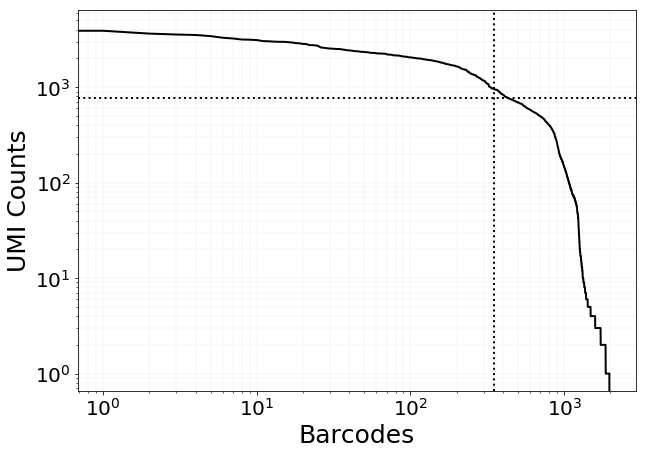

In [33]:
knee = np.sort((np.array(adata.X.sum(axis=1))).flatten())[::-1]

fig, ax = plt.subplots(figsize=(10, 7))

expected_num_cells=350#350

ax.loglog(range(len(knee)), knee, linewidth=2, color="k")
ax.axhline(y=775, linewidth=2, color="k", ls=':') # knee[expected_num_cells]
ax.axvline(x=351, linewidth=2, color="k", ls=':')# expected_num_cells

ax.set_ylabel("UMI Counts", size=25)
ax.set_xlabel("Barcodes", size=25)
ax.tick_params(labelsize=20)
plt.grid(True, which="both", lw=.1)
plt.savefig('kneePlot.svg', dpi=600)
plt.show()

In [34]:
knee[expected_num_cells]

951.0

In [35]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_cells(adata, min_counts=500)#knee[expected_num_cells])
sc.pp.filter_genes(adata, min_cells=10)

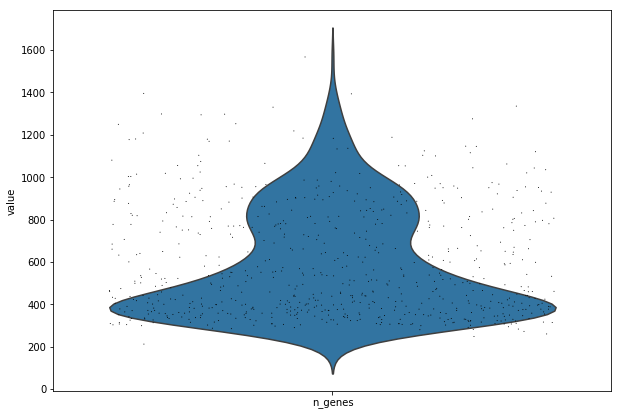

In [36]:
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.violin(adata, 'n_genes', jitter=0.4, ax=ax)

In [37]:
adata.raw = sc.pp.log1p(adata, copy=True)
#sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

In [14]:
#filter_result = sc.pp.highly_variable_genes(adata, min_disp=0.3,inplace=False, n_top_genes=1209)
#sc.pl.highly_variable_genes(filter_result)
#print("{:,} highly variable genes".format(sum(x[0] for x in filter_result)))

In [46]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=10)
sc.tl.leiden(adata, resolution=.2)

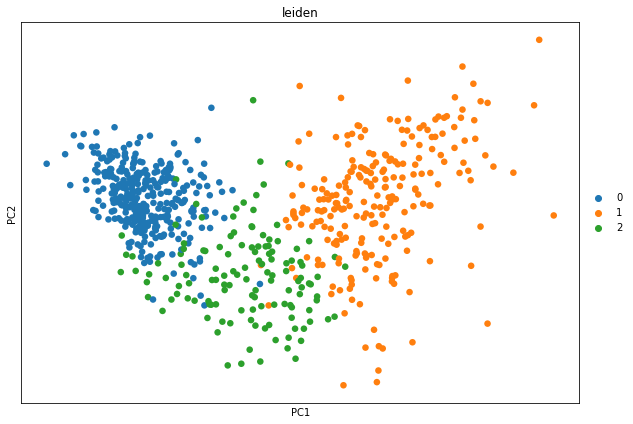

In [47]:
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.pca(adata, color="leiden", ax=ax)

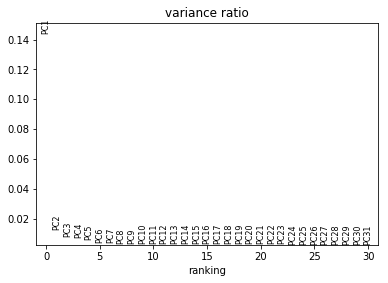

In [42]:
sc.pl.pca_variance_ratio(adata)

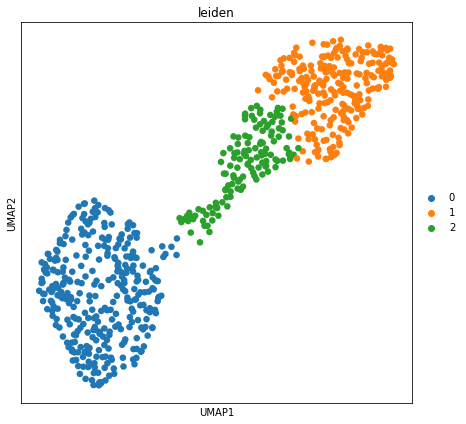

In [44]:
sc.tl.umap(adata)

fig, ax = plt.subplots(figsize=(7, 7))
sc.pl.umap(adata, color="leiden", ax=ax, save="getting_started_tsne.svg")

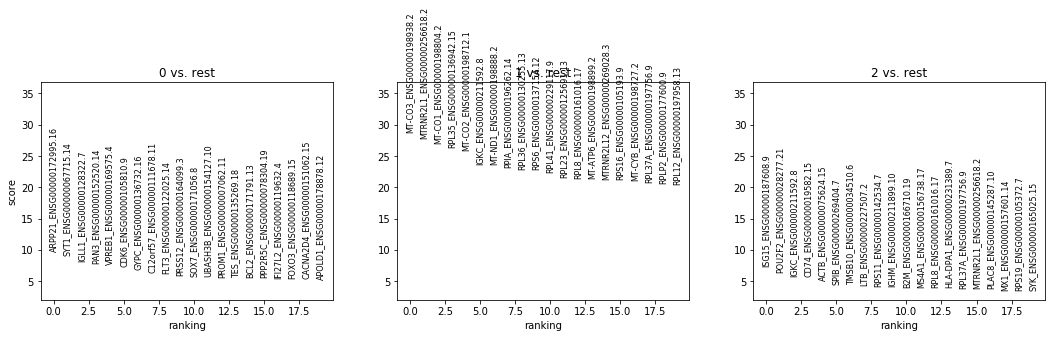

In [45]:
sc.tl.rank_genes_groups(adata,"leiden")
sc.pl.rank_genes_groups(adata)

<309785x1382 sparse matrix of type '<class 'numpy.float64'>'
	with 464808 stored elements in COOrdinate format>

In [20]:
dense_count_matrix = count_matrix.todense()
counts_df = pd.DataFrame(dense_count_matrix)
# Take a peek at what the count matrix look like
counts_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
pca = PCA(n_components=20)
pca.fit(dense_count_matrix)
pca_points1 = pca.transform(dense_count_matrix)

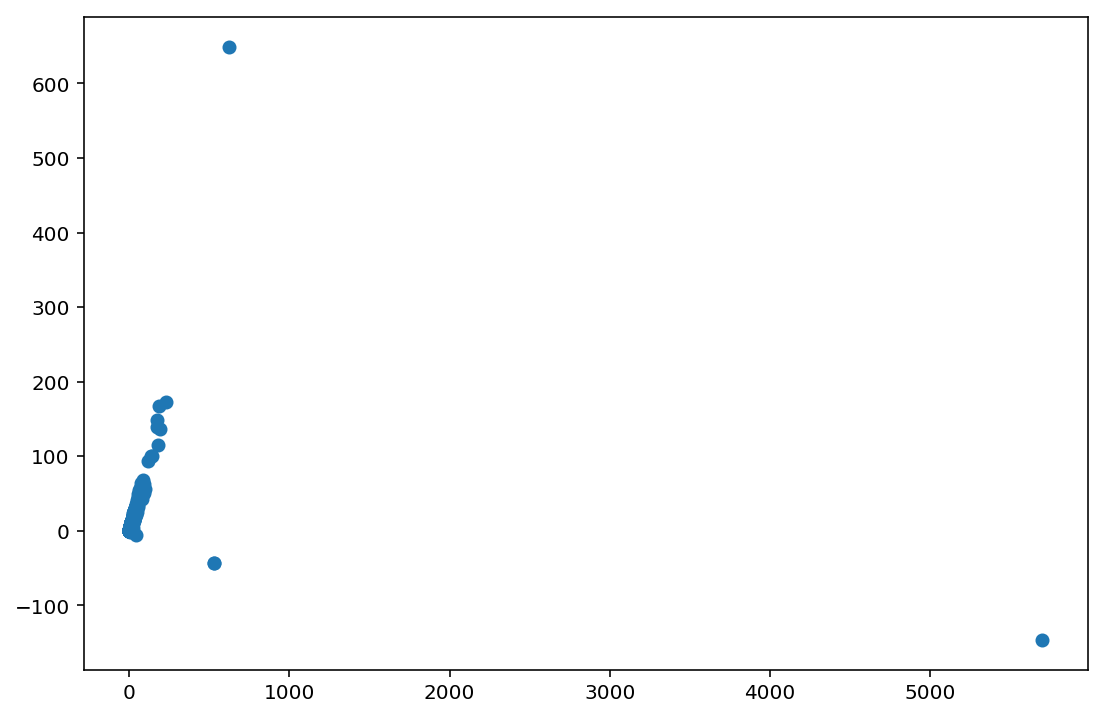

In [22]:
pca_x1 = pca_points1[:,:1,].flatten()
pca_y1 = pca_points1[:,1:2,].flatten()

matplotlib.pyplot.scatter(pca_x1,pca_y1)
plt.show()

Load gene count matrix, genes and barcodes for plotting

Get gene counts for human genes and mouse genes for each cell barcode

Total number of cell barcodes: 1998


Generate barnyard plot

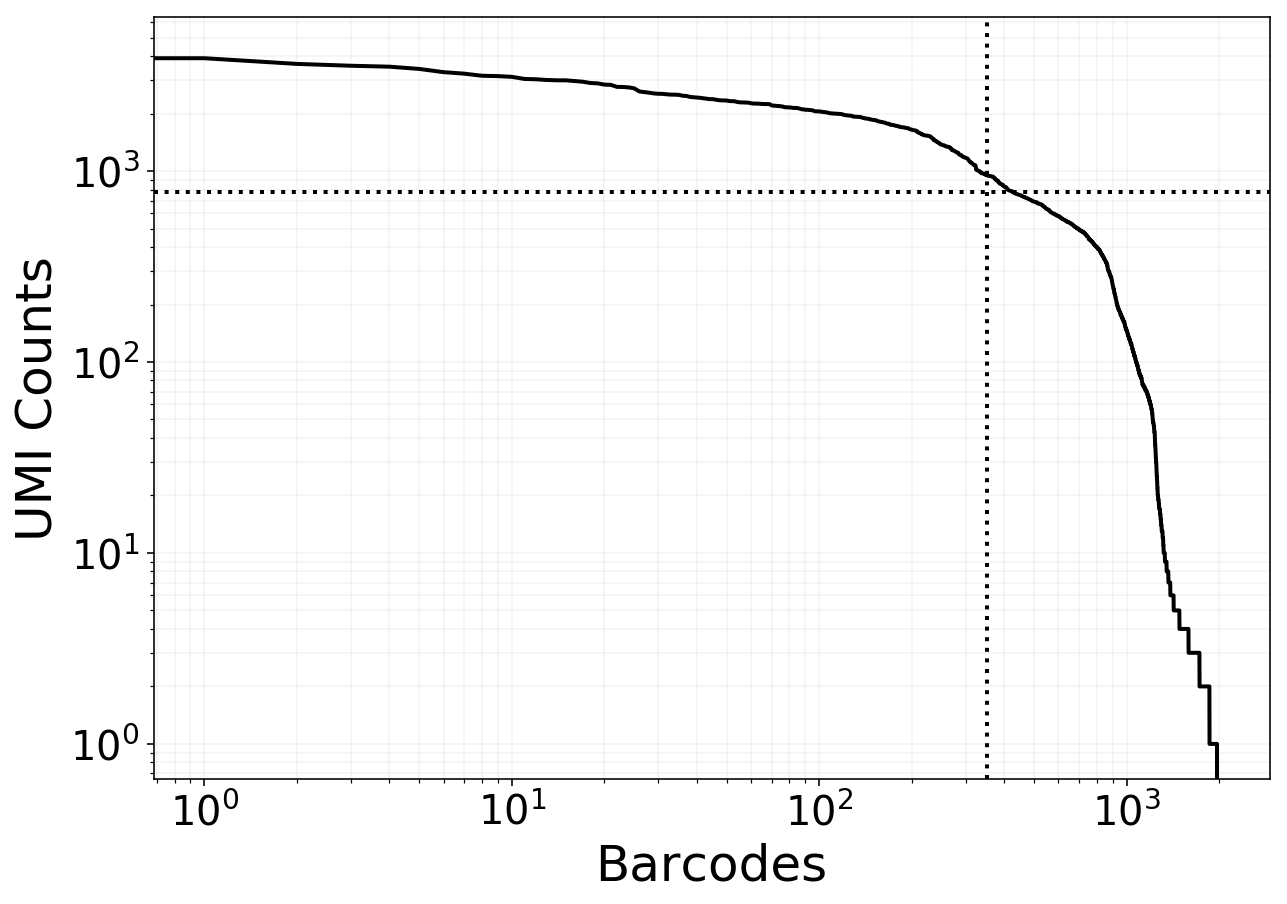

951.0

AnnData object with n_obs × n_vars = 695 × 7717 
    obs: 'counts_human', 'counts_total', 'n_genes', 'n_counts'
    var: 'n_cells'

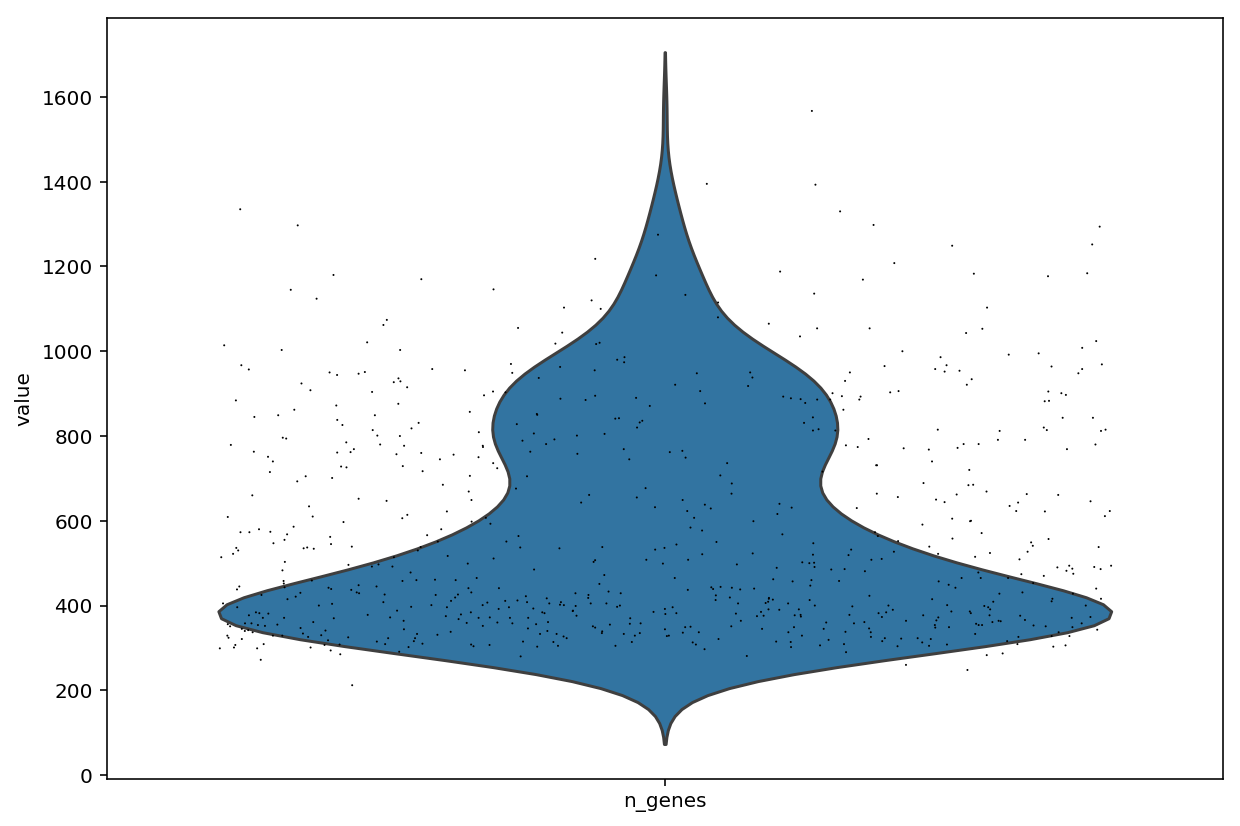

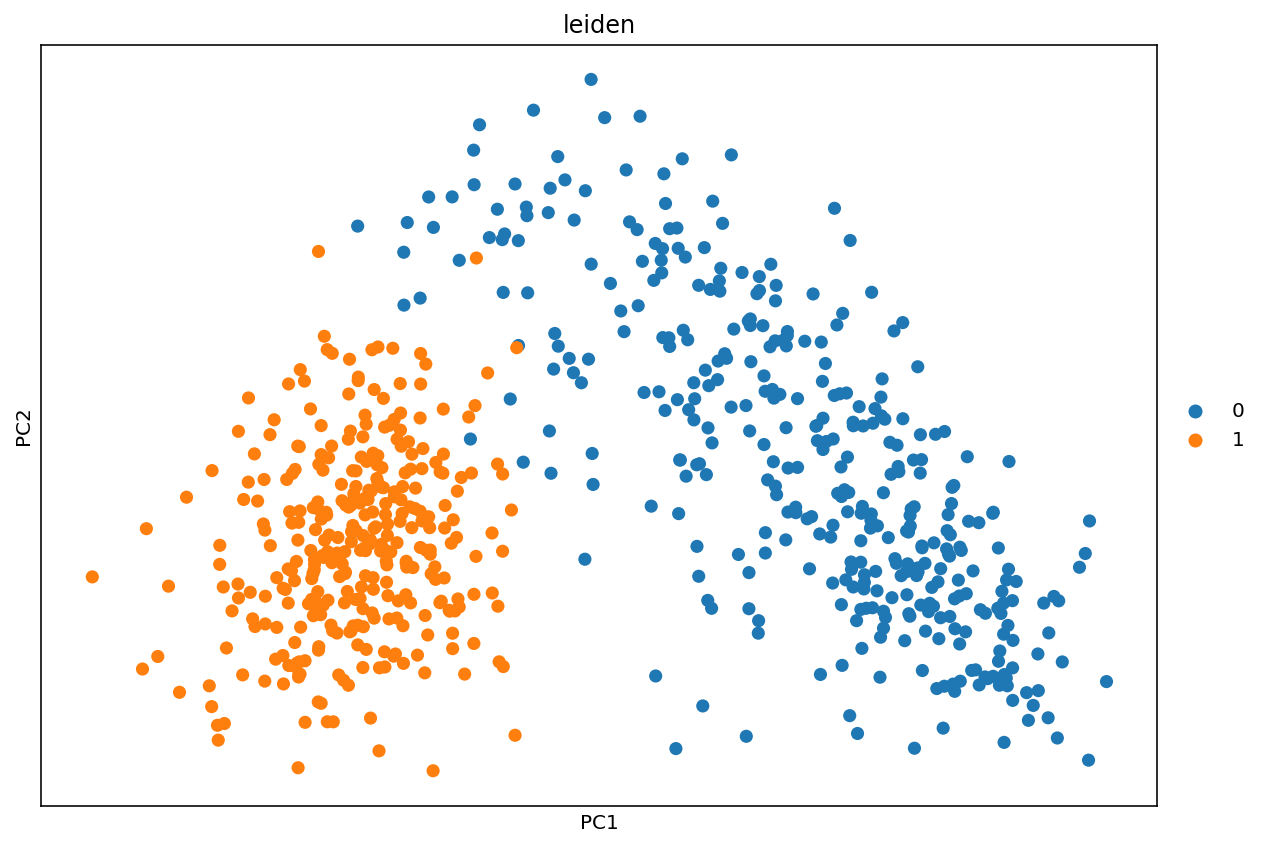

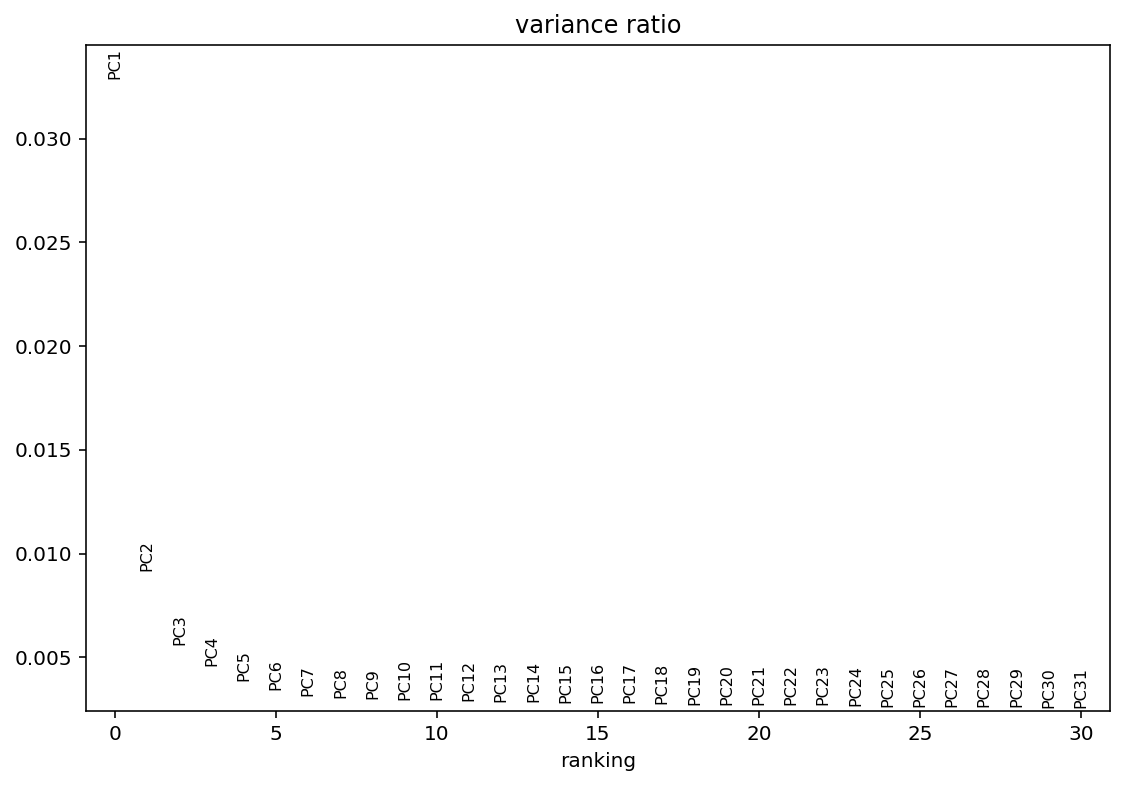

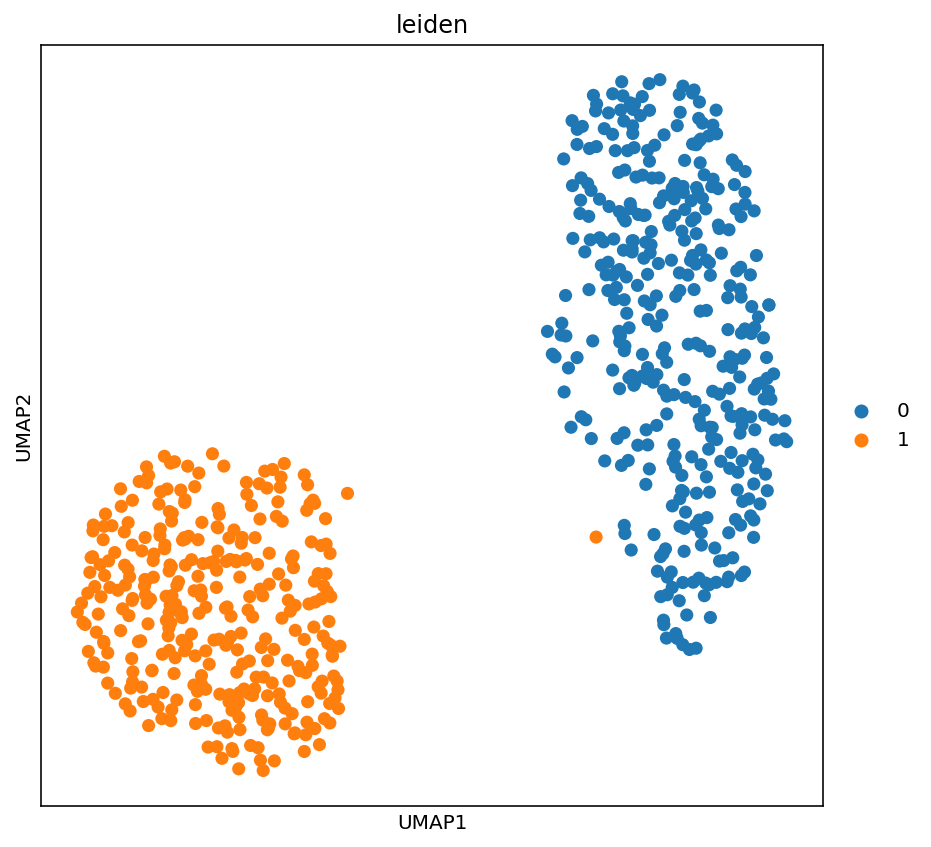

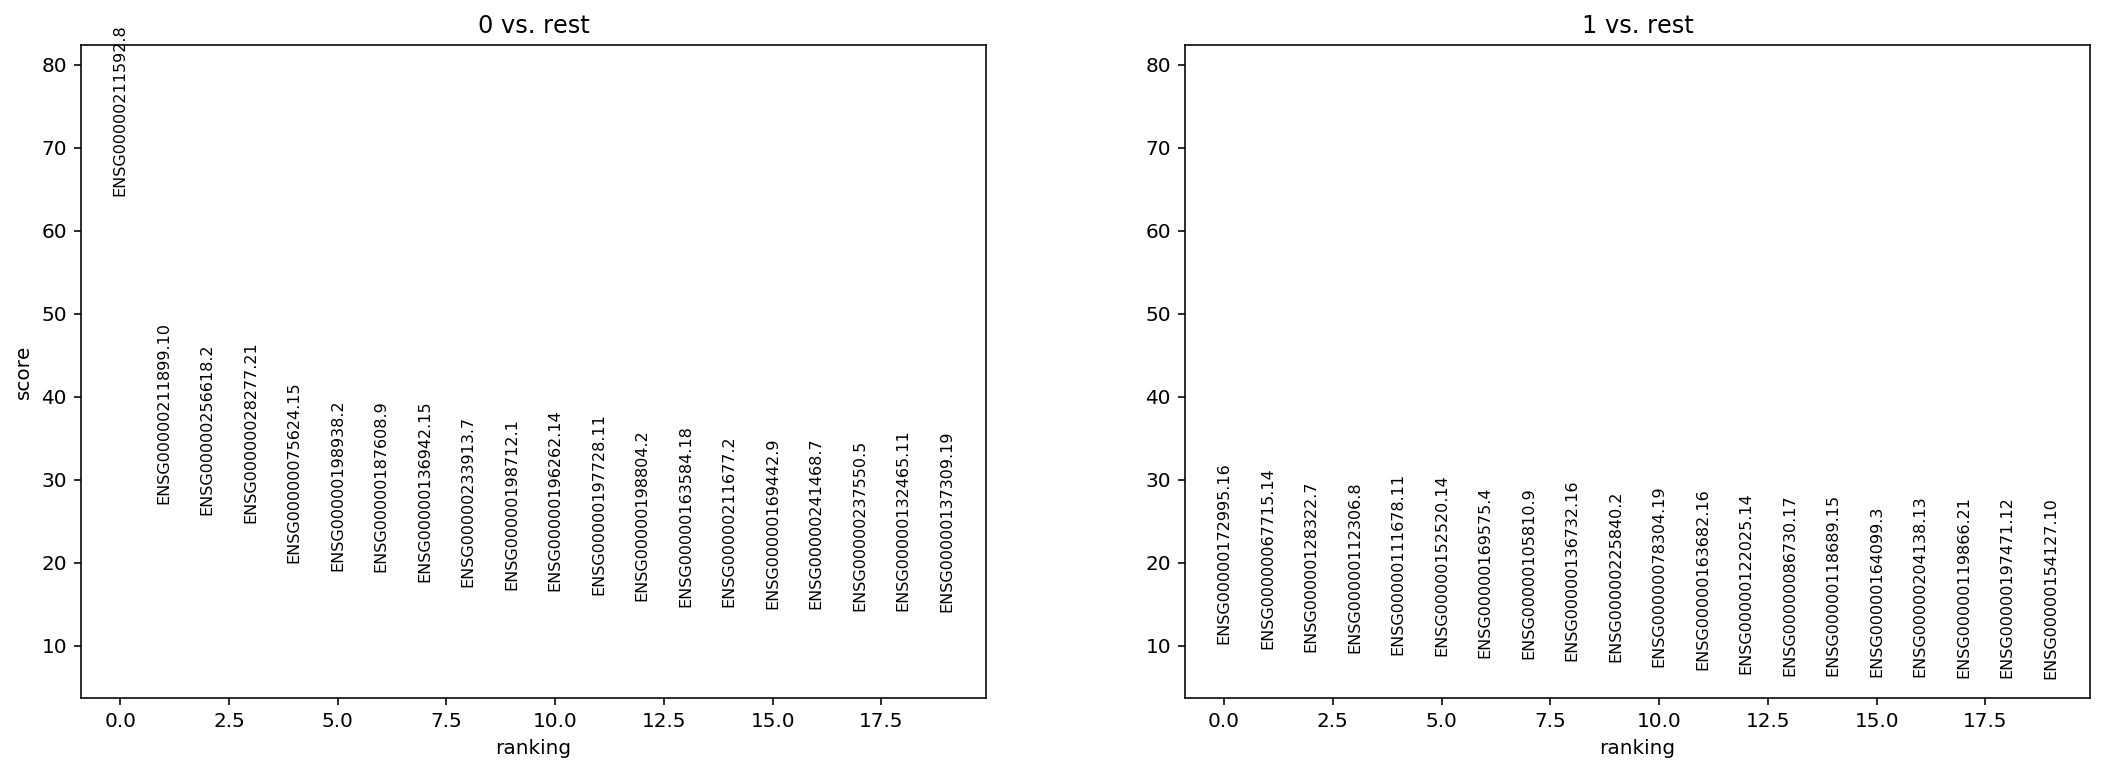

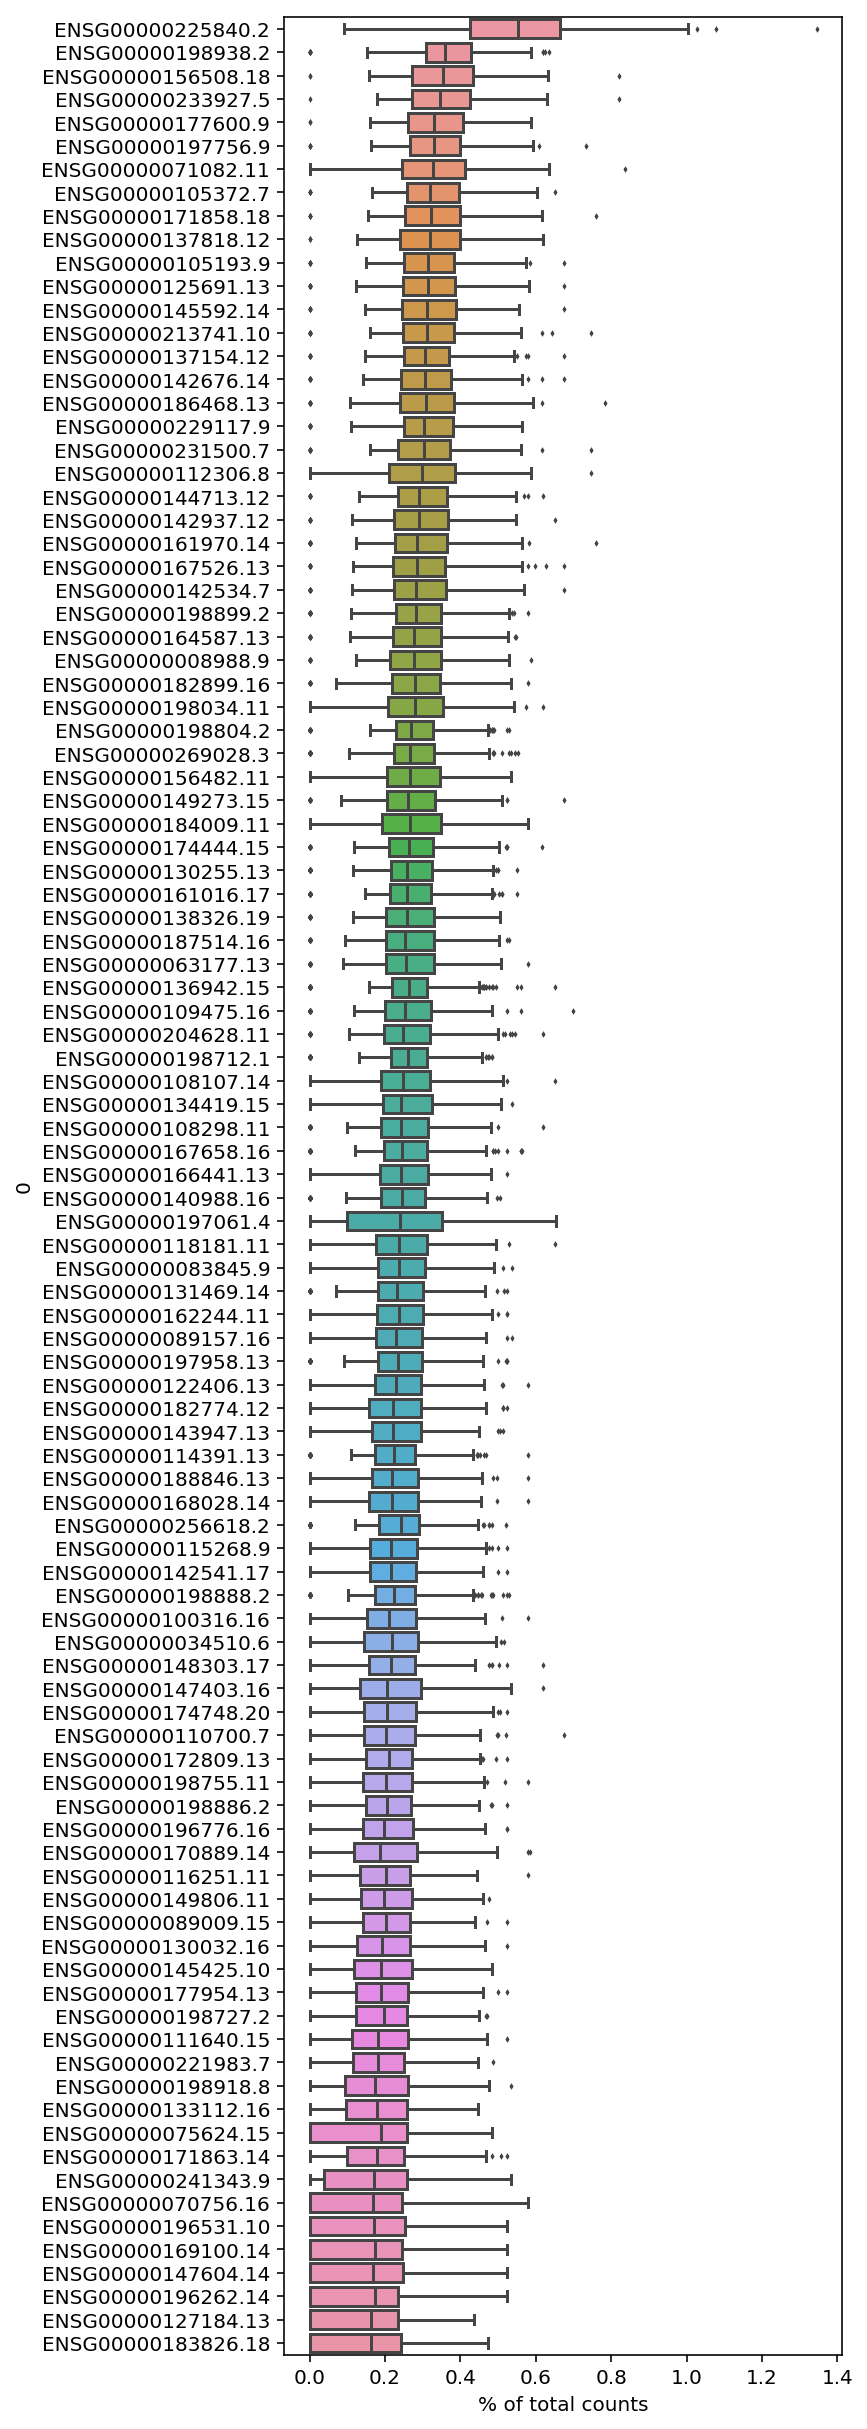

In [173]:
sc.pl.highest_expr_genes(adata, n_top=100)

In [263]:
col = []
for i in np.array(adata.obs['leiden']).astype(int):
    col.append(adata.uns['leiden_colors'][i])

xy = np.vstack([adata.obs['counts_human'], adata.obs['counts_mouse']])
z = gaussian_kde(xy)(xy)
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(9,9))
plt.scatter(adata.obs['counts_human'], adata.obs['counts_mouse'], c=col, 
            s=70, edgecolor='', cmap='viridis')
plt.title('100 1:1 Mixture of Human (K562) and Mouse (NIH3T3) Cells')
plt.xlabel('Human Transcripts')
plt.ylabel('Mouse Transcripts')
#plt.colorbar()
plt.savefig('barnyard.svg', dpi=600)
plt.show()

KeyError: 'counts_mouse'

In [ ]:
adata.uns['leiden_colors'][0] = 'tab:blue'
adata.uns['leiden_colors'][1] = 'tab:brown'
adata.uns['leiden_colors'][2] = 'tab:brown'
adata.uns['leiden_colors'][3] = 'darkgrey'
adata.uns['leiden_colors'][4] = 'darkgrey'

In [ ]:
from collections import Counter
print('mouse, ',Counter(np.array(adata.obs['leiden']))['0'])
print('human, ',Counter(np.array(adata.obs['leiden']))['1']+Counter(np.array(adata.obs['leiden']))['2'])
print('ambig, ',Counter(np.array(adata.obs['leiden']))['3']+Counter(np.array(adata.obs['leiden']))['4'])

In [ ]:
np.median(adata.obs['counts_total'][np.array(adata.obs['leiden'])=='0'])

In [ ]:
np.median(adata.obs['counts_total'][np.logical_or(np.array(adata.obs['leiden'])=='1', np.array(adata.obs['leiden'])=='2')])

In [ ]:
np.median(adata.obs['counts_total'][np.logical_or(np.array(adata.obs['leiden'])=='3', np.array(adata.obs['leiden'])=='4')])